In [2]:
# !pip install numpy
# !pip install tensorflow
# !pip install matplotlib

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
mnist = input_data.read_data_sets("MNIST_data")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
def generator(z, reuse = None):
    with tf.variable_scope('gen', reuse = reuse):
        hidden1 = tf.layers.dense(inputs = z, units=128, activation=tf.nn.leaky_relu)
        hidden2 = tf.layers.dense(inputs = hidden1, units=128, activation=tf.nn.leaky_relu)
        output = tf.layers.dense(inputs = hidden2, units=784, activation=tf.nn.tanh)
        
        return output       

In [6]:
def discriminator(X, reuse=None):
    with tf.variable_scope('dis', reuse=reuse):
        hidden1 = tf.layers.dense(inputs = X, units = 128, activation = tf.nn.leaky_relu)
        hidden2 = tf.layers.dense(inputs = hidden1, units = 128, activation = tf.nn.leaky_relu)
        logits = tf.layers.dense(inputs = hidden2, units = 1)
        output = tf.sigmoid(logits)
        
        return output, logits

In [7]:
tf.reset_default_graph()

real_images = tf.placeholder(tf.float32, shape = [None, 784])
z = tf.placeholder(tf.float32, shape = [None, 100])

G = generator(z)
D_output_real, D_logits_real = discriminator(real_images)
D_output_fake, D_logits_fake = discriminator(G, reuse=True)

In [10]:
def loss_func(logits_in, labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_in, labels = labels_in))

In [11]:
D_real_loss = loss_func(D_logits_real, tf.ones_like(D_logits_real)*0.9)
D_fake_loss = loss_func(D_logits_fake, tf.zeros_like(D_logits_real))
D_loss = D_real_loss + D_fake_loss

G_loss = loss_func(D_logits_fake, tf.ones_like(D_logits_fake))

In [12]:
lr = 0.001

tvars = tf.trainable_variables()
d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

D_trainer = tf.train.AdamOptimizer(lr).minimize(D_loss, var_list = d_vars)
G_trainer = tf.train.AdamOptimizer(lr).minimize(G_loss, var_list = g_vars)

batch_size = 100
epochs = 500
init = tf.global_variables_initializer()

On Epoch:0
On Epoch:1
On Epoch:2
On Epoch:3
On Epoch:4
On Epoch:5
On Epoch:6
On Epoch:7
On Epoch:8
On Epoch:9
On Epoch:10
On Epoch:11
On Epoch:12
On Epoch:13
On Epoch:14
On Epoch:15
On Epoch:16
On Epoch:17
On Epoch:18
On Epoch:19
On Epoch:20
On Epoch:21
On Epoch:22
On Epoch:23
On Epoch:24
On Epoch:25
On Epoch:26
On Epoch:27
On Epoch:28
On Epoch:29
On Epoch:30
On Epoch:31
On Epoch:32
On Epoch:33
On Epoch:34
On Epoch:35
On Epoch:36
On Epoch:37
On Epoch:38
On Epoch:39
On Epoch:40
On Epoch:41
On Epoch:42
On Epoch:43
On Epoch:44
On Epoch:45
On Epoch:46
On Epoch:47
On Epoch:48
On Epoch:49
On Epoch:50
On Epoch:51
On Epoch:52
On Epoch:53
On Epoch:54
On Epoch:55
On Epoch:56
On Epoch:57
On Epoch:58
On Epoch:59
On Epoch:60
On Epoch:61
On Epoch:62
On Epoch:63
On Epoch:64
On Epoch:65
On Epoch:66
On Epoch:67
On Epoch:68
On Epoch:69
On Epoch:70
On Epoch:71
On Epoch:72
On Epoch:73
On Epoch:74
On Epoch:75
On Epoch:76
On Epoch:77
On Epoch:78
On Epoch:79
On Epoch:80
On Epoch:81
On Epoch:82
On Epoch:83
On

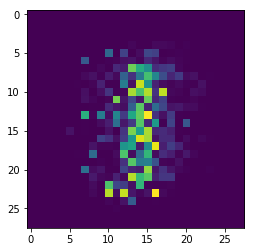

In [13]:
samples = []

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        num_batches = mnist.train.num_examples//batch_size
        
        for i in range(num_batches):
            batch = mnist.train.next_batch(batch_size)
            batch_images = batch[0].reshape((batch_size,784))
            batch_images = batch_images*2 -1
            batch_z = np.random.uniform(-1, 1, size =(batch_size, 100))
            _ = sess.run(D_trainer, feed_dict={real_images:batch_images, z:batch_z})
            _ = sess.run(G_trainer, feed_dict={z:batch_z})
            
        print("On Epoch:{}".format(epoch))
        
        sample_z = np.random.uniform(-1, 1, size=(1, 100))
        gen_sample = sess.run(generator(z, reuse=True), feed_dict={z:sample_z})
        
        samples.append(gen_sample)
        
# plt.imshow(samples[0].reshape(28,28))

# plt.imshow(samples[49].reshape(28,28))

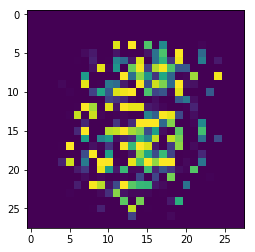

In [39]:
plt.imshow(samples[460].reshape(28,28))

In [32]:
# samples[:10]